In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pygeostat as gs
import numpy as np

In [3]:
nx, ny, nz, xsiz, ysiz, zsiz, xmn, ymn, zmn = 144,171, 1, 3, 3, 1, 62.599, 58, 0 
gdef = [nx, xmn, xsiz, ny, ymn, ysiz, nz, zmn, zsiz] 

In [4]:
grid = gs.GridDef(gdef)

In [5]:
data = gs.DataFile('modelos', griddef=grid)

In [6]:
data.columns

Index(['bs_gauss_25_12_0', 'bs_gauss_25_12_1', 'bs_gauss_25_12_10',
       'bs_gauss_25_12_2', 'bs_gauss_25_12_3', 'bs_gauss_25_12_4',
       'bs_gauss_25_12_5', 'bs_gauss_25_12_6', 'bs_gauss_25_12_7',
       'bs_gauss_25_12_8', 'bs_gauss_25_12_9', 'bs_gauss_25_12_num_cats_12.0',
       'bs_gauss_50_12_0', 'bs_gauss_50_12_1', 'bs_gauss_50_12_10',
       'bs_gauss_50_12_2', 'bs_gauss_50_12_3', 'bs_gauss_50_12_4',
       'bs_gauss_50_12_5', 'bs_gauss_50_12_6', 'bs_gauss_50_12_7',
       'bs_gauss_50_12_8', 'bs_gauss_50_12_9', 'bs_gauss_50_12_num_cats_12.0',
       'bs_gauss_50_20_0', 'bs_gauss_50_20_1', 'bs_gauss_50_20_10',
       'bs_gauss_50_20_2', 'bs_gauss_50_20_3', 'bs_gauss_50_20_4',
       'bs_gauss_50_20_5', 'bs_gauss_50_20_6', 'bs_gauss_50_20_7',
       'bs_gauss_50_20_8', 'bs_gauss_50_20_9', 'bs_gauss_50_20_num_cats_20.0',
       'bs_sph_50_12_0', 'bs_sph_50_12_1', 'bs_sph_50_12_10', 'bs_sph_50_12_2',
       'bs_sph_50_12_3', 'bs_sph_50_12_4', 'bs_sph_50_12_5', 'bs_sph_50_12_6'

In [7]:
data.head()

,bs_gauss_25_12_0,bs_gauss_25_12_1,bs_gauss_25_12_10,bs_gauss_25_12_2,bs_gauss_25_12_3,bs_gauss_25_12_4,bs_gauss_25_12_5,bs_gauss_25_12_6,bs_gauss_25_12_7,bs_gauss_25_12_8,...,spherical_50__real1,spherical_50__real10,spherical_50__real2,spherical_50__real3,spherical_50__real4,spherical_50__real5,spherical_50__real6,spherical_50__real7,spherical_50__real8,spherical_50__real9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.819367,-2.160281,-2.160281,-0.819367,-2.160281,1.382830,-2.160281,-1.659551,-2.160281,1.744348
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.943738,-1.484893,-1.484893,-0.943738,-1.484893,0.735010,-1.484893,-0.621675,-1.484893,1.280625
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.056101,-0.885042,-0.885042,-1.056101,-0.885042,0.032984,-0.885042,-0.304265,-0.885042,0.528498
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.363782,-0.693265,-0.693265,-1.363782,-0.693265,0.651859,-0.693265,-0.428404,-0.693265,0.723614
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.253089,-0.868458,-0.868458,-1.253089,-0.868458,0.729949,-0.868458,0.471534,-0.868458,0.836160


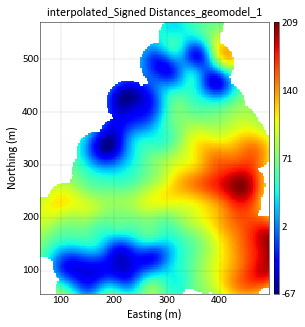

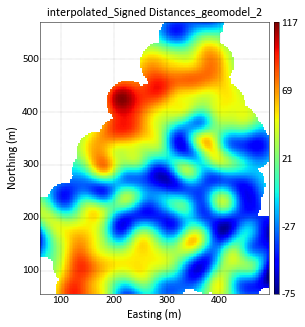

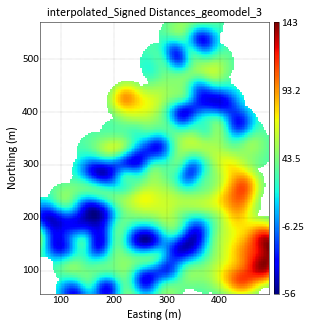

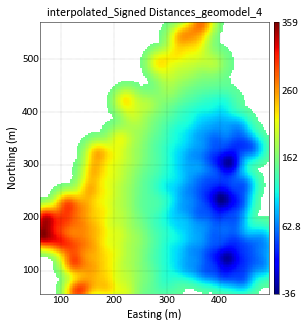

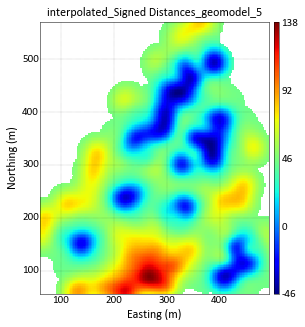

In [8]:
for i in range(1,6):
    _ = gs.slice_plot(data, 
                      var='interpolated_Signed Distances_geomodel_{}'.format(i), 
                      cmap='jet', 
                      figsize=(5,5), 
                      grid=True, 
                      output_file='int_sd_{}.png'.format(i))

In [31]:
cat_dict = {1: 'Argovian',
            2: 'Kimmeridgian',
            3: 'Sequian',
            4: 'Portlandian',
            5: 'Quartenary'}

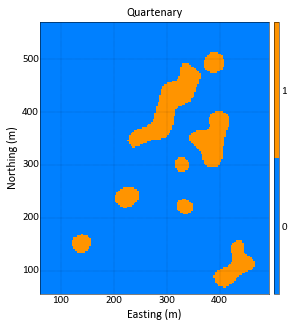

In [34]:
a = np.where(data['interpolated_Signed Distances_geomodel_5'] < 0, 1, 0)
data['Quartenary'] = a
_ = gs.slice_plot(data,
                  var='Quartenary',
                  cmap='jet', 
                  figsize=(5,5), 
                  grid=True, 
                  output_file='geomodel_quaternary.png')

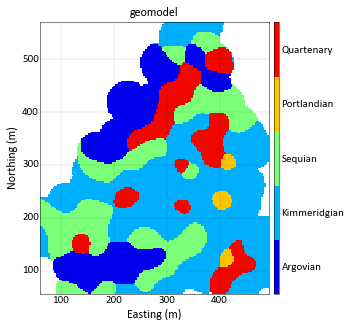

In [10]:
_ = gs.slice_plot(data, 
                  var='geomodel', 
                  cmap='jet', 
                  catdict=cat_dict, 
                  figsize=(5,5), 
                  grid=True, 
                  output_file='geomodel.png')

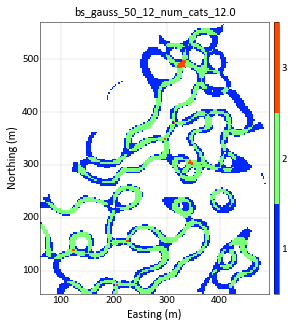

In [11]:
a = np.where(data['bs_gauss_50_12_num_cats_12.0'] > 0, data['bs_gauss_50_12_num_cats_12.0'], float('nan'))
data['bs_gauss_50_12_num_cats_12.0'] = a
_ = gs.slice_plot(data, 
                  var='bs_gauss_50_12_num_cats_12.0', 
                  cmap='jet', 
                  figsize=(5,5), 
                  grid=True, 
                  output_file='bandwidth12.png')

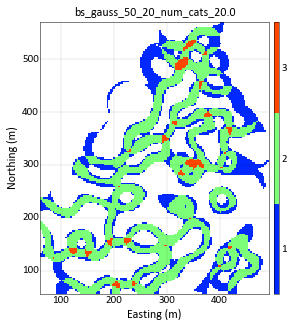

In [12]:
a = np.where(data['bs_gauss_50_20_num_cats_20.0'] > 0, data['bs_gauss_50_20_num_cats_20.0'], float('nan'))
data['bs_gauss_50_20_num_cats_20.0'] = a
_ = gs.slice_plot(data, 
                  var='bs_gauss_50_20_num_cats_20.0', 
                  cmap='jet', 
                  figsize=(5,5), 
                  grid=True, 
                  output_file='bandwidth20.png')

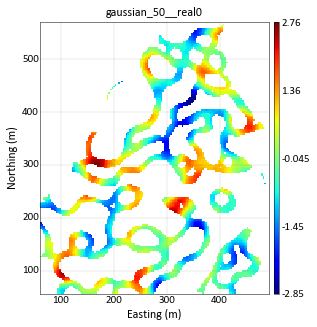

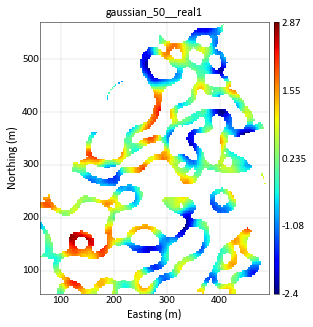

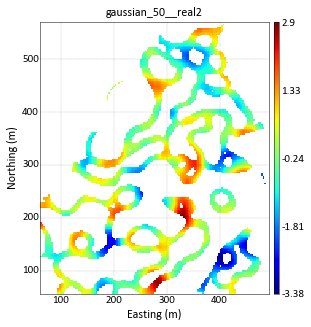

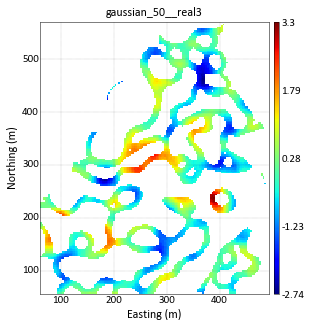

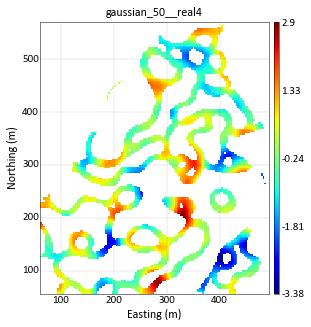

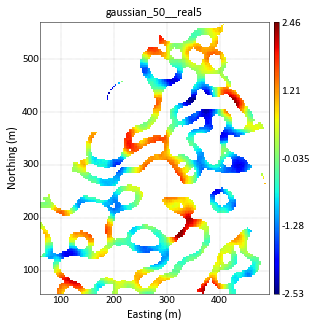

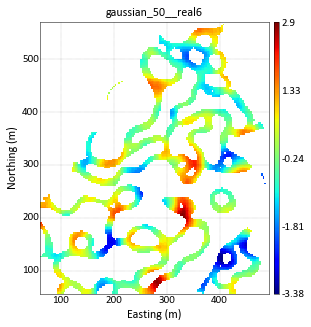

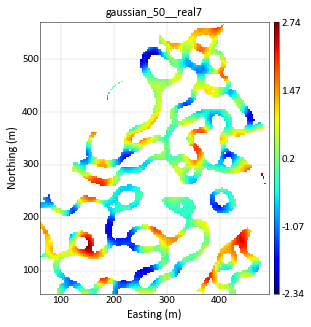

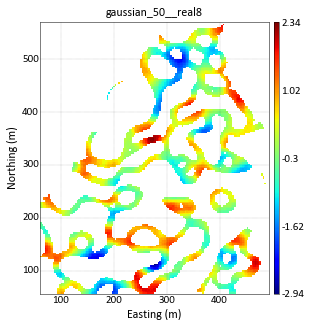

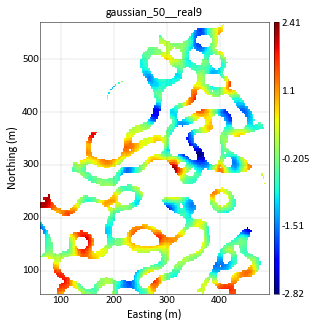

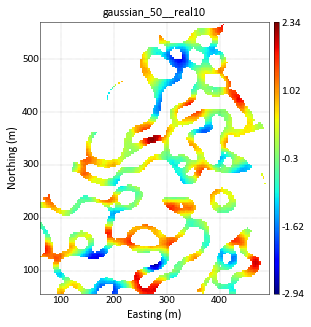

In [13]:
#simulations
for i in range(0,11):
    a = np.where(data['bs_gauss_50_12_num_cats_12.0'] > 0, data['gaussian_50__real{}'.format(i)], float('nan'))
    data['gaussian_50__real{}'.format(i)] = a
    _ = gs.slice_plot(data, 
                      var='gaussian_50__real{}'.format(i), 
                      cmap='jet', 
                      figsize=(5,5), 
                      grid=True, 
                      output_file='gausssim_{}_12.png'.format(i))

C:\Users\Roberto Rolo\anaconda3\envs\geostat\lib\site-packages\pygeostat\plotting\utils.py:556: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


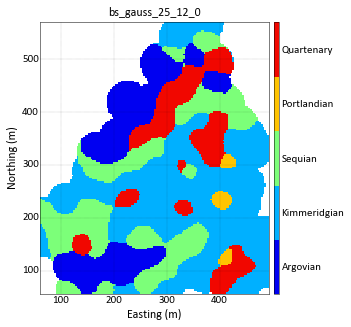

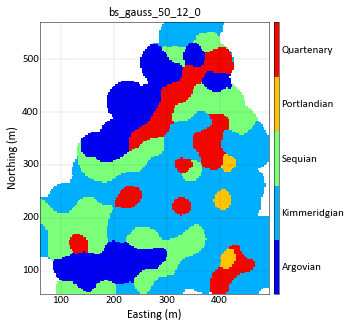

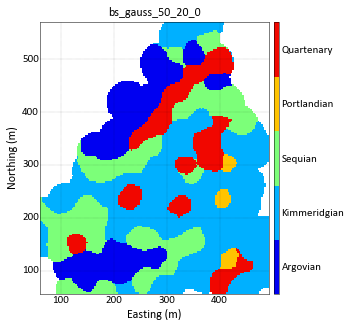

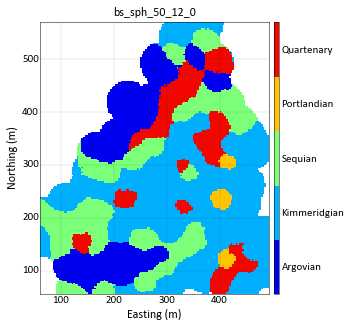

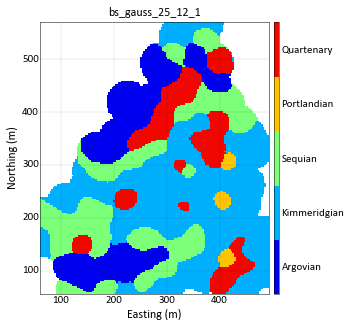

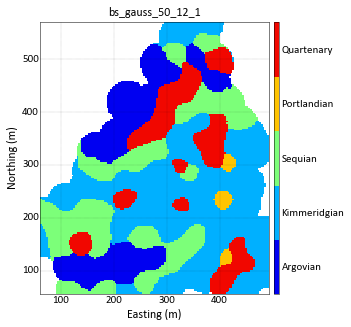

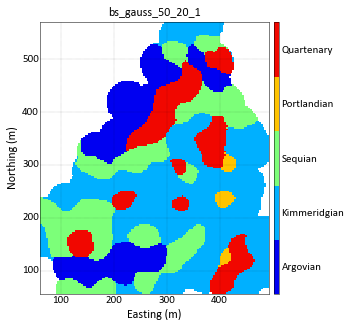

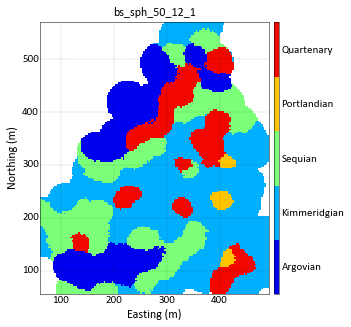

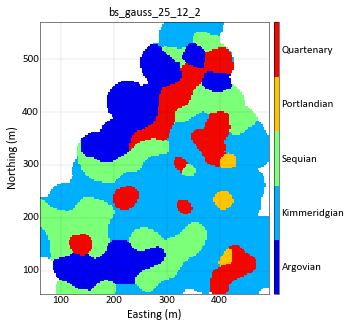

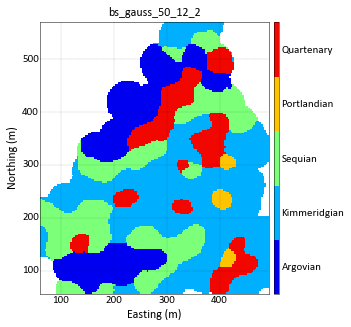

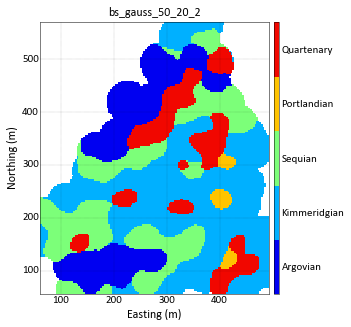

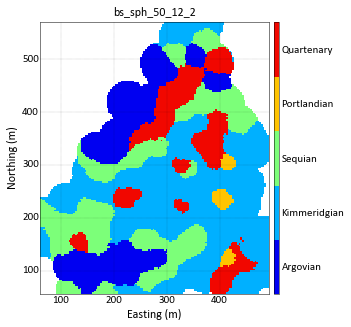

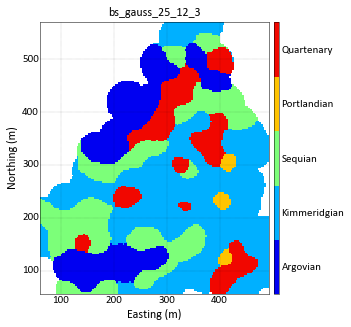

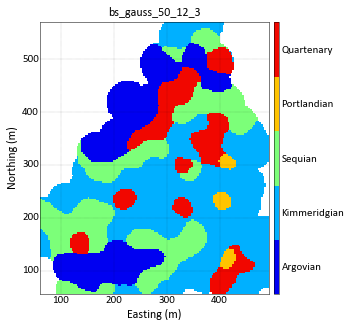

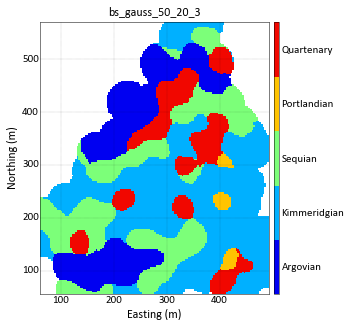

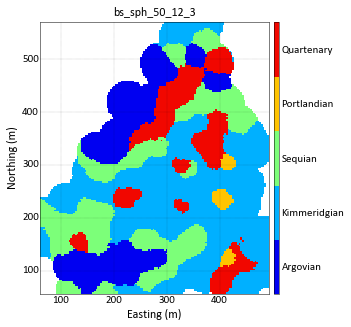

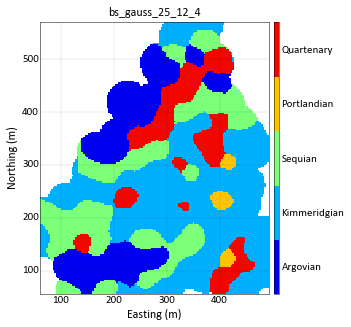

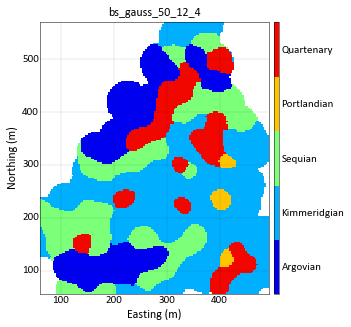

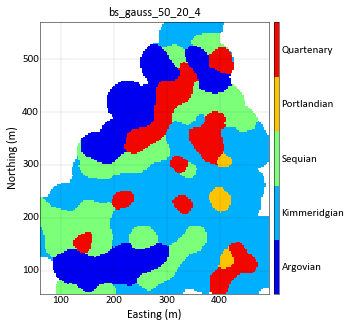

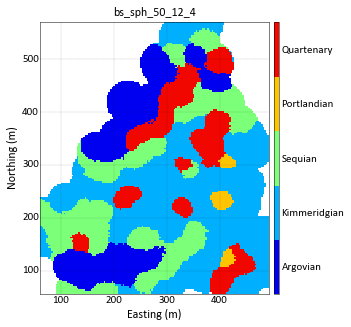

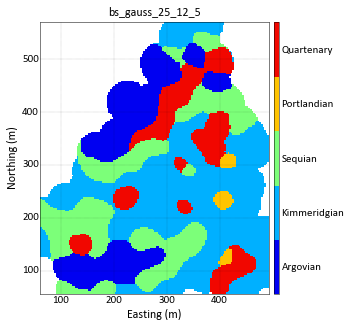

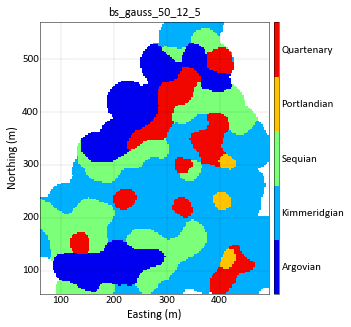

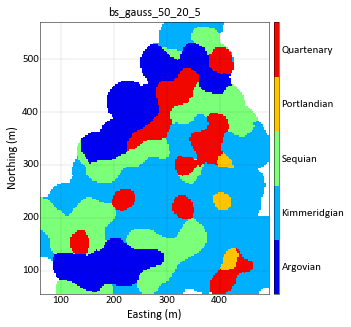

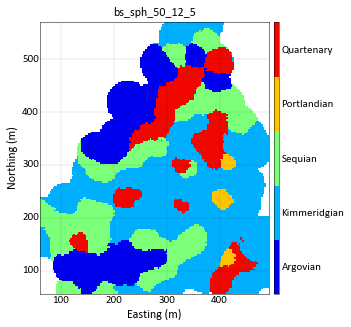

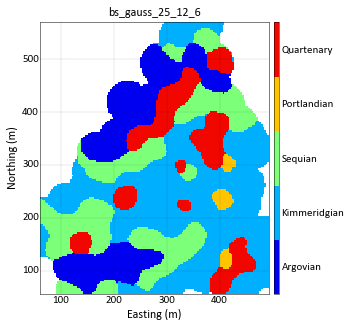

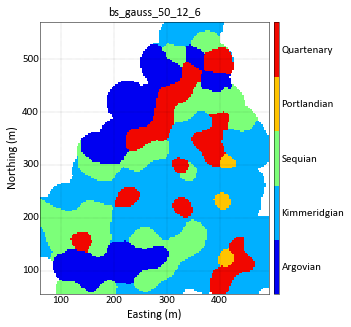

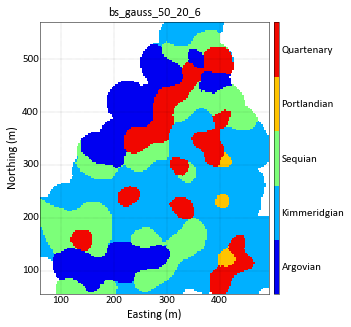

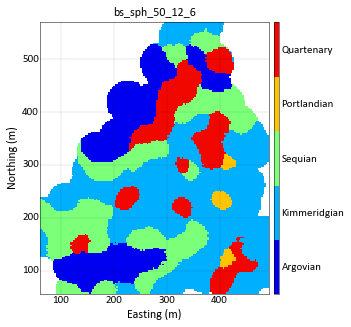

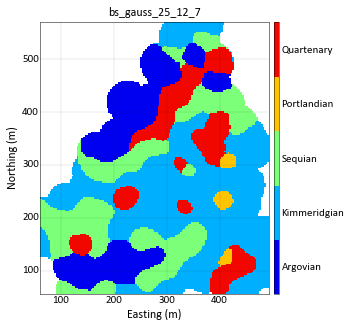

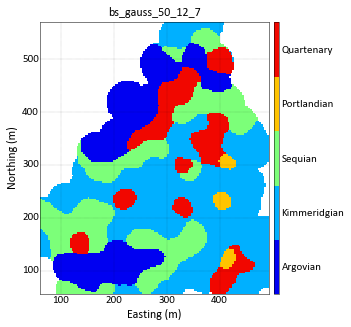

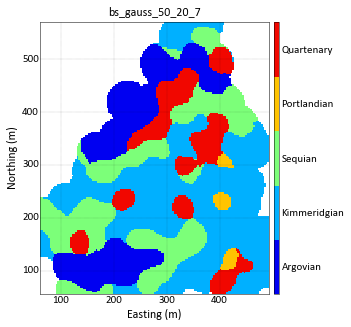

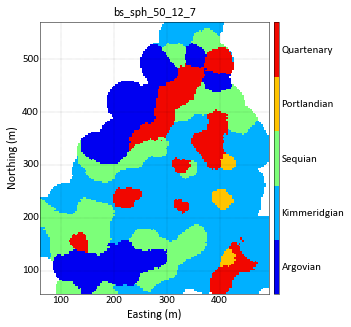

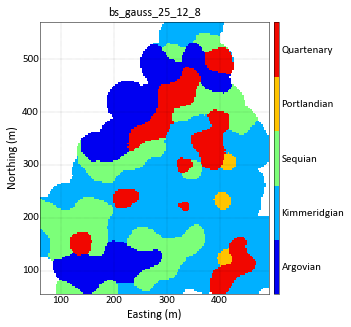

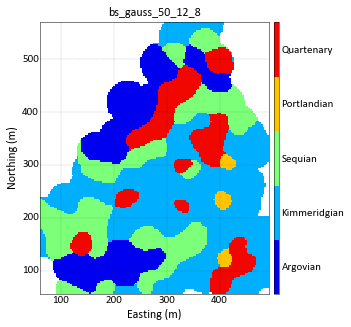

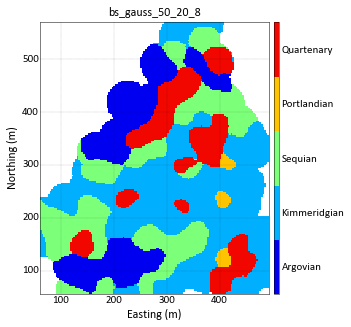

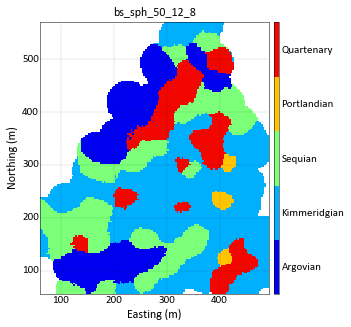

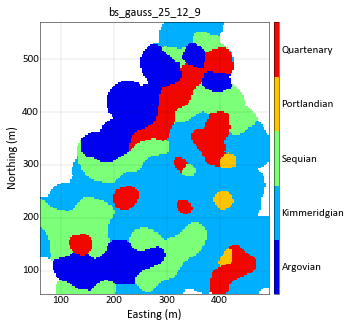

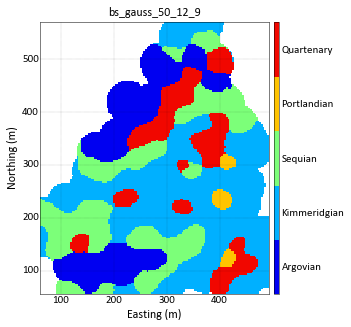

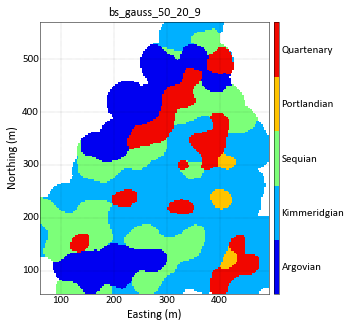

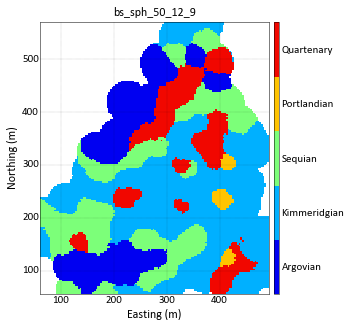

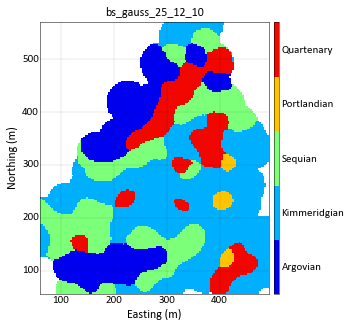

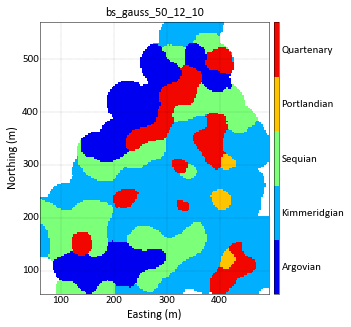

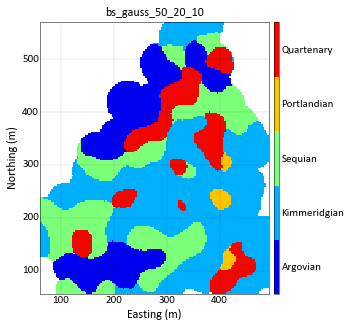

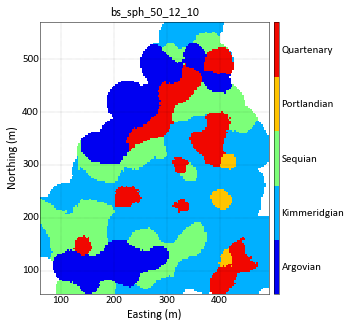

In [14]:
for i in range(0,11):
    _ = gs.slice_plot(data, 
                      var='bs_gauss_25_12_{}'.format(i), 
                      cmap='jet', 
                      catdict=cat_dict, 
                      figsize=(5,5), 
                      grid=True, 
                      output_file='gauss_real_{}_25_12.png'.format(i))
    
    _ = gs.slice_plot(data, 
                  var='bs_gauss_50_12_{}'.format(i), 
                  cmap='jet', 
                  catdict=cat_dict, 
                  figsize=(5,5), 
                  grid=True, 
                  output_file='gauss_real_{}_50_12.png'.format(i))
    
    _ = gs.slice_plot(data, 
                  var='bs_gauss_50_20_{}'.format(i), 
                  cmap='jet', 
                  catdict=cat_dict, 
                  figsize=(5,5), 
                  grid=True, 
                  output_file='gauss_real_{}_50_20.png'.format(i))
    
    _ = gs.slice_plot(data, 
              var='bs_sph_50_12_{}'.format(i), 
              cmap='jet', 
              catdict=cat_dict, 
              figsize=(5,5), 
              grid=True, 
              output_file='sph_real_{}_50_12.png'.format(i))

In [15]:
def backflag(x, y, z, prop, grid, reals, output='images/backflag.png'):
    prop = prop.values
    codes = np.unique(prop)
    xg, yg, zg = grid.get_coordinates()
    gpts = np.array([xg, yg, zg]).T
    tree = spatial.KDTree(gpts)
    pts = np.array([x, y, z]).T
    ids = []
    for p in pts:
        i = tree.query(p)[1]
        ids.append(i)
    
    reals_values = [reals[r].values[ids] for r in reals.columns]
    cms = [confusion_matrix(prop, pred) for pred in reals_values]
    sum_ew = np.sum(cms, axis=0)
    final_cm = sum_ew / sum_ew.astype(np.float).sum(axis=1)
    
    plt.figure(figsize=(6,5))
    sns_plot = sns.heatmap(final_cm, annot=True, vmin=0.0, vmax=1.0, fmt='.2f')
    plt.yticks(np.arange(len(codes))+0.5, labels=codes)
    plt.xticks(np.arange(len(codes))+0.5, labels=codes)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('Actual', fontsize=10)
    figure = sns_plot.get_figure()
    figure.savefig(output, dpi=300)

In [16]:
def entropy(reals):
    
    cats = np.unique(reals[reals.columns[0]])
    shanon_entropy = []
    
    for idx, row in reals.iterrows():
        entropy = 0
        a = row.values
        for cat in cats:
            p_cat = np.sum(a==cat)/len(a)
            if p_cat > 0:
                e = - p_cat * np.log(p_cat)
                entropy = entropy + e
        shanon_entropy.append(entropy)
    
    return np.array(shanon_entropy)

In [17]:
reals = data[['bs_gauss_50_12_0', 'bs_gauss_50_12_1', 'bs_gauss_50_12_10',
       'bs_gauss_50_12_2', 'bs_gauss_50_12_3', 'bs_gauss_50_12_4',
       'bs_gauss_50_12_5', 'bs_gauss_50_12_6', 'bs_gauss_50_12_7',
       'bs_gauss_50_12_8', 'bs_gauss_50_12_9']]

In [18]:
shanon_entropy = entropy(reals)

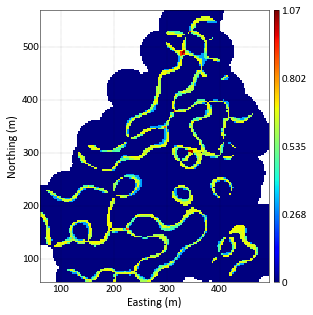

In [22]:
a = np.where(np.isfinite(data['geomodel']),shanon_entropy, float('nan'))
_ = gs.slice_plot(a, 
                  griddef=grid,
                  cmap='jet', 
                  figsize=(5,5), 
                  grid=True, 
                  output_file='jura_entropy_12.png')

In [23]:
reals = data[['bs_gauss_50_20_0', 'bs_gauss_50_20_1', 'bs_gauss_50_20_10',
       'bs_gauss_50_20_2', 'bs_gauss_50_20_3', 'bs_gauss_50_20_4',
       'bs_gauss_50_20_5', 'bs_gauss_50_20_6', 'bs_gauss_50_20_7',
       'bs_gauss_50_20_8', 'bs_gauss_50_20_9']]

In [24]:
shanon_entropy = entropy(reals)

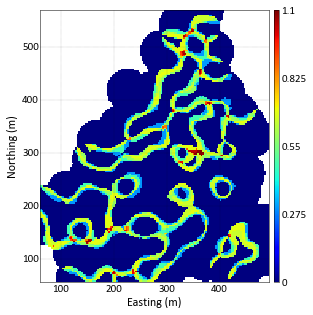

In [26]:
a = np.where(np.isfinite(data['geomodel']),shanon_entropy, float('nan'))
_ = gs.slice_plot(a, 
                  griddef=grid,
                  cmap='jet', 
                  figsize=(5,5), 
                  grid=True, 
                  output_file='jura_entropy_20.png')